## Importing Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Stock Data

In [2]:
stock=yf.download('GRASIM.NS',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False).reset_index()
stock.columns = stock.columns.droplevel(1)  # Removes multi-index nature of columns
stock=stock.drop('Date',axis=1)
stock.columns.name = None   # Removes name of columns that describes what column represents
stock

,Close,High,Low,Open,Volume
0,750.938782,759.923059,739.672070,749.821818,2143086
1,754.872498,757.494896,742.537328,752.735702,1746130
2,769.004395,771.626792,749.384709,757.591926,2418947
3,768.907288,771.626818,758.563216,769.004420,1706604
4,762.642639,780.902531,759.631652,771.286952,2363692
...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682


## USD INR Exchange Rate

In [3]:
er=pd.DataFrame(pd.read_csv('USD_INR.csv')['Price']).iloc[:1238,:]
er=er.rename({'Price':'Exchange Rate'},axis=1)
er

,Exchange Rate
0,88.003
1,87.991
2,87.810
3,88.782
4,88.665
...,...
1233,72.915
1234,72.970
1235,72.985
1236,72.970


## Interest Rate (Repo Rate)

In [4]:
ir=pd.DataFrame(pd.read_csv('Interest Rate.csv')['Interest Rate (%)']).iloc[:1238,:]
ir

,Interest Rate (%)
0,5.5
1,5.5
2,5.5
3,5.5
4,5.5
...,...
1233,4.0
1234,4.0
1235,4.0
1236,4.0


## Crude Oil Prices

In [5]:
oil=pd.DataFrame(pd.read_csv('Oil Price.csv')[['Price','Vol.']]).iloc[:1238,:]
oil=oil.rename({'Price':'Oil Price','Vol.':'Oil Vol'},axis=1)
oil['Oil Vol']=oil['Oil Vol'].apply(lambda x: str(x).replace('K',''))
oil['Oil Vol']=oil['Oil Vol'].apply(lambda x: float(x)*1000)
oil

,Oil Price,Oil Vol
0,56.95,5520.0
1,57.54,108750.0
2,57.46,203870.0
3,58.27,224920.0
4,58.27,232450.0
...,...,...
1233,56.70,170650.0
1234,56.07,147930.0
1235,55.54,173150.0
1236,54.62,182830.0


## FPI Data

In [6]:
fpi=pd.read_csv("FPI Data.csv")
fpi

,FPI Data
0,2.453022e+07
1,1.312243e+09
2,6.617675e+07
3,1.031920e+11
4,1.131740e+11
...,...
1233,2.793077e+09
1234,2.793077e+09
1235,2.793077e+09
1236,2.793077e+09


## Parent Indices Data

**NIFTY 50**

In [7]:
nifty50=yf.download('^NSEI',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty50.columns = nifty50.columns.droplevel(1)  
nifty50=nifty50.drop('Date',axis=1)
nifty50.columns.name = None   
nifty50=nifty50.rename(columns={'Close':'NIFTY50 Close','Volume':'NIFTY50 Vol'})
nifty50

,NIFTY50 Close,NIFTY50 Vol
0,11873.049805,541400
1,11896.799805,453600
2,11937.650391,623700
3,11896.450195,544900
4,11930.349609,502300
...,...,...
1232,25227.349609,234300
1233,25145.500000,292100
1234,25323.550781,289900
1235,25585.300781,372800


**NIFTY Commodities**

In [8]:
nifty_commodities=yf.download('^CNXCMDT',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty_commodities.columns = nifty_commodities.columns.droplevel(1)  
nifty_commodities=nifty_commodities.drop('Date',axis=1)
nifty_commodities.columns.name = None
nifty_commodities=nifty_commodities.rename(columns={'Close':'NIFTYCMDT Close','Volume':'NIFTYCMDT Vol'})
nifty_commodities

,NIFTYCMDT Close,NIFTYCMDT Vol
0,3186.300049,2402300
1,3170.350098,1930200
2,3204.949951,2849600
3,3225.500000,2414300
4,3222.750000,2256200
...,...,...
1217,9116.599609,0
1218,9050.650391,0
1219,9142.700195,0
1220,9211.349609,0


**NIFTY Infrastructure**

In [9]:
nifty_infrastructure=yf.download('^CNXINFRA',start='2020-10-19',end='2025-10-19',auto_adjust=True,progress=False)[['Close','Volume']].reset_index()
nifty_infrastructure.columns = nifty_infrastructure.columns.droplevel(1)  
nifty_infrastructure=nifty_infrastructure.drop('Date',axis=1)
nifty_infrastructure.columns.name = None  
nifty_infrastructure=nifty_infrastructure.rename(columns={'Close':'NIFTYINFRA Close','Volume':'NIFTYINFRA Vol'}) 
nifty_infrastructure

,NIFTYINFRA Close,NIFTYINFRA Vol
0,3090.750000,2397700
1,3093.149902,2342600
2,3122.050049,2964600
3,3145.100098,3196700
4,3152.399902,3180700
...,...,...
1217,9174.500000,1677000
1218,9134.500000,1744800
1219,9227.099609,1995000
1220,9305.349609,1795900


## Combining, Cleaning & Feature Engineering

In [10]:
final=pd.concat([stock,nifty50,nifty_infrastructure,nifty_commodities,er,ir,oil,fpi],axis=1)
final

,Close,High,Low,Open,Volume,NIFTY50 Close,NIFTY50 Vol,NIFTYINFRA Close,NIFTYINFRA Vol,NIFTYCMDT Close,NIFTYCMDT Vol,Exchange Rate,Interest Rate (%),Oil Price,Oil Vol,FPI Data
0,750.938782,759.923059,739.672070,749.821818,2143086,11873.049805,541400.0,3090.750000,2397700.0,3186.300049,2402300.0,88.003,5.5,56.95,5520.0,2.453022e+07
1,754.872498,757.494896,742.537328,752.735702,1746130,11896.799805,453600.0,3093.149902,2342600.0,3170.350098,1930200.0,87.991,5.5,57.54,108750.0,1.312243e+09
2,769.004395,771.626792,749.384709,757.591926,2418947,11937.650391,623700.0,3122.050049,2964600.0,3204.949951,2849600.0,87.810,5.5,57.46,203870.0,6.617675e+07
3,768.907288,771.626818,758.563216,769.004420,1706604,11896.450195,544900.0,3145.100098,3196700.0,3225.500000,2414300.0,88.782,5.5,58.27,224920.0,1.031920e+11
4,762.642639,780.902531,759.631652,771.286952,2363692,11930.349609,502300.0,3152.399902,3180700.0,3222.750000,2256200.0,88.665,5.5,58.27,232450.0,1.131740e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622,25145.500000,292100.0,NaN,NaN,NaN,NaN,72.915,4.0,56.70,170650.0,2.793077e+09
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183,25323.550781,289900.0,NaN,NaN,NaN,NaN,72.970,4.0,56.07,147930.0,2.793077e+09
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912,25585.300781,372800.0,NaN,NaN,NaN,NaN,72.985,4.0,55.54,173150.0,2.793077e+09
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682,25709.849609,422100.0,NaN,NaN,NaN,NaN,72.970,4.0,54.62,182830.0,2.793077e+09


In [11]:
final['EMA_20'] = final['Close'].ewm(span=20, adjust=False).mean()
final['EMA_50'] = final['Close'].ewm(span=50, adjust=False).mean()
final['EMA_100'] = final['Close'].ewm(span=100, adjust=False).mean()
final['Gained']=(final['Close']-final['Close'].shift(1)).where(final['Close']>final['Close'].shift(1), 0)
final['Lost']=(abs(final['Close']-final['Close'].shift(1))).where(final['Close']<final['Close'].shift(1), 0)
final['RSI']=(100*final['Gained'].rolling(14).sum()/final['Lost'].rolling(14).sum())/(1+final['Gained'].rolling(14).sum()/final['Lost'].rolling(14).sum())
final['Log Returns']=np.log(final['Close']/final['Close'].shift(1))
final['Volatility']=final['Close'].rolling(20).std()
final['H/L']=final['High']/final['Low']
final['VR1']=final['Volume']/final['NIFTY50 Vol']
final['VR2']=final['Volume']/final['NIFTYINFRA Vol']
final['VR3']=final['Volume']/final['NIFTYCMDT Vol']
final['NIFTY50 Change']=final['NIFTY50 Close']-final['NIFTY50 Close'].shift(1)
final['NIFTYINFRA Change']=final['NIFTYINFRA Close']-final['NIFTYINFRA Close'].shift(1)
final['NIFTYCMDT Change']=final['NIFTYCMDT Close']-final['NIFTYCMDT Close'].shift(1)

In [12]:
final['Target'] = np.where(final['Close'].shift(-1) > final['Close'], 1, 0)
final.fillna(method='ffill',inplace=True)
final.reset_index(inplace=True)

In [13]:
final=final.drop(['index','Gained','Lost'],axis=1)
final.dropna(inplace=True)
final

,Close,High,Low,Open,Volume,NIFTY50 Close,NIFTY50 Vol,NIFTYINFRA Close,NIFTYINFRA Vol,NIFTYCMDT Close,...,Log Returns,Volatility,H/L,VR1,VR2,VR3,NIFTY50 Change,NIFTYINFRA Change,NIFTYCMDT Change,Target
19,817.179443,823.638394,795.957133,803.241650,5942145,12719.950195,513900.0,3355.300049,2253300.0,3482.250000,...,0.017264,17.011349,1.034777,11.562843,2.637086,2.820728,29.150391,11.199951,34.800049,0
20,814.508362,820.336011,811.108905,818.781951,326158,12874.200195,707700.0,3390.449951,3262400.0,3532.350098,...,-0.003274,19.394832,1.011376,0.460870,0.099975,0.090984,154.250000,35.149902,50.100098,1
21,818.684937,828.980442,811.546117,822.570056,1893365,12938.250000,731300.0,3421.500000,3329000.0,3537.949951,...,0.005115,21.659002,1.021483,2.589040,0.568749,0.704823,64.049805,31.050049,5.599854,1
22,824.561157,827.232121,814.168519,817.373712,1727008,12771.700195,768800.0,3390.050049,3686800.0,3509.350098,...,0.007152,24.312385,1.016045,2.246368,0.468430,0.560517,-166.549805,-31.449951,-28.599854,0
23,812.711609,837.139053,808.098055,820.530355,1931331,12859.049805,664000.0,3405.300049,3826300.0,3533.750000,...,-0.014475,25.461177,1.035937,2.908631,0.504752,0.712169,87.349609,15.250000,24.399902,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,2798.000000,2812.000000,2778.500000,2791.100098,280622,25145.500000,292100.0,9338.549805,3282500.0,9194.299805,...,-0.004635,39.184202,1.012057,0.960705,0.096430,inf,-81.849609,33.200195,-17.049805,0
1234,2775.800049,2808.000000,2757.899902,2798.000000,316183,25323.550781,289900.0,9338.549805,3282500.0,9194.299805,...,-0.007966,39.840926,1.018166,1.090662,0.096430,inf,178.050781,33.200195,-17.049805,1
1235,2816.800049,2824.899902,2774.199951,2780.000000,459912,25585.300781,372800.0,9338.549805,3282500.0,9194.299805,...,0.014662,39.016079,1.018276,1.233670,0.096430,inf,261.750000,33.200195,-17.049805,1
1236,2859.800049,2875.000000,2817.100098,2825.699951,517682,25709.849609,422100.0,9338.549805,3282500.0,9194.299805,...,0.015150,38.582485,1.020553,1.226444,0.096430,inf,124.548828,33.200195,-17.049805,0


## Multicollinearity Check 

**Correlation Matrix**

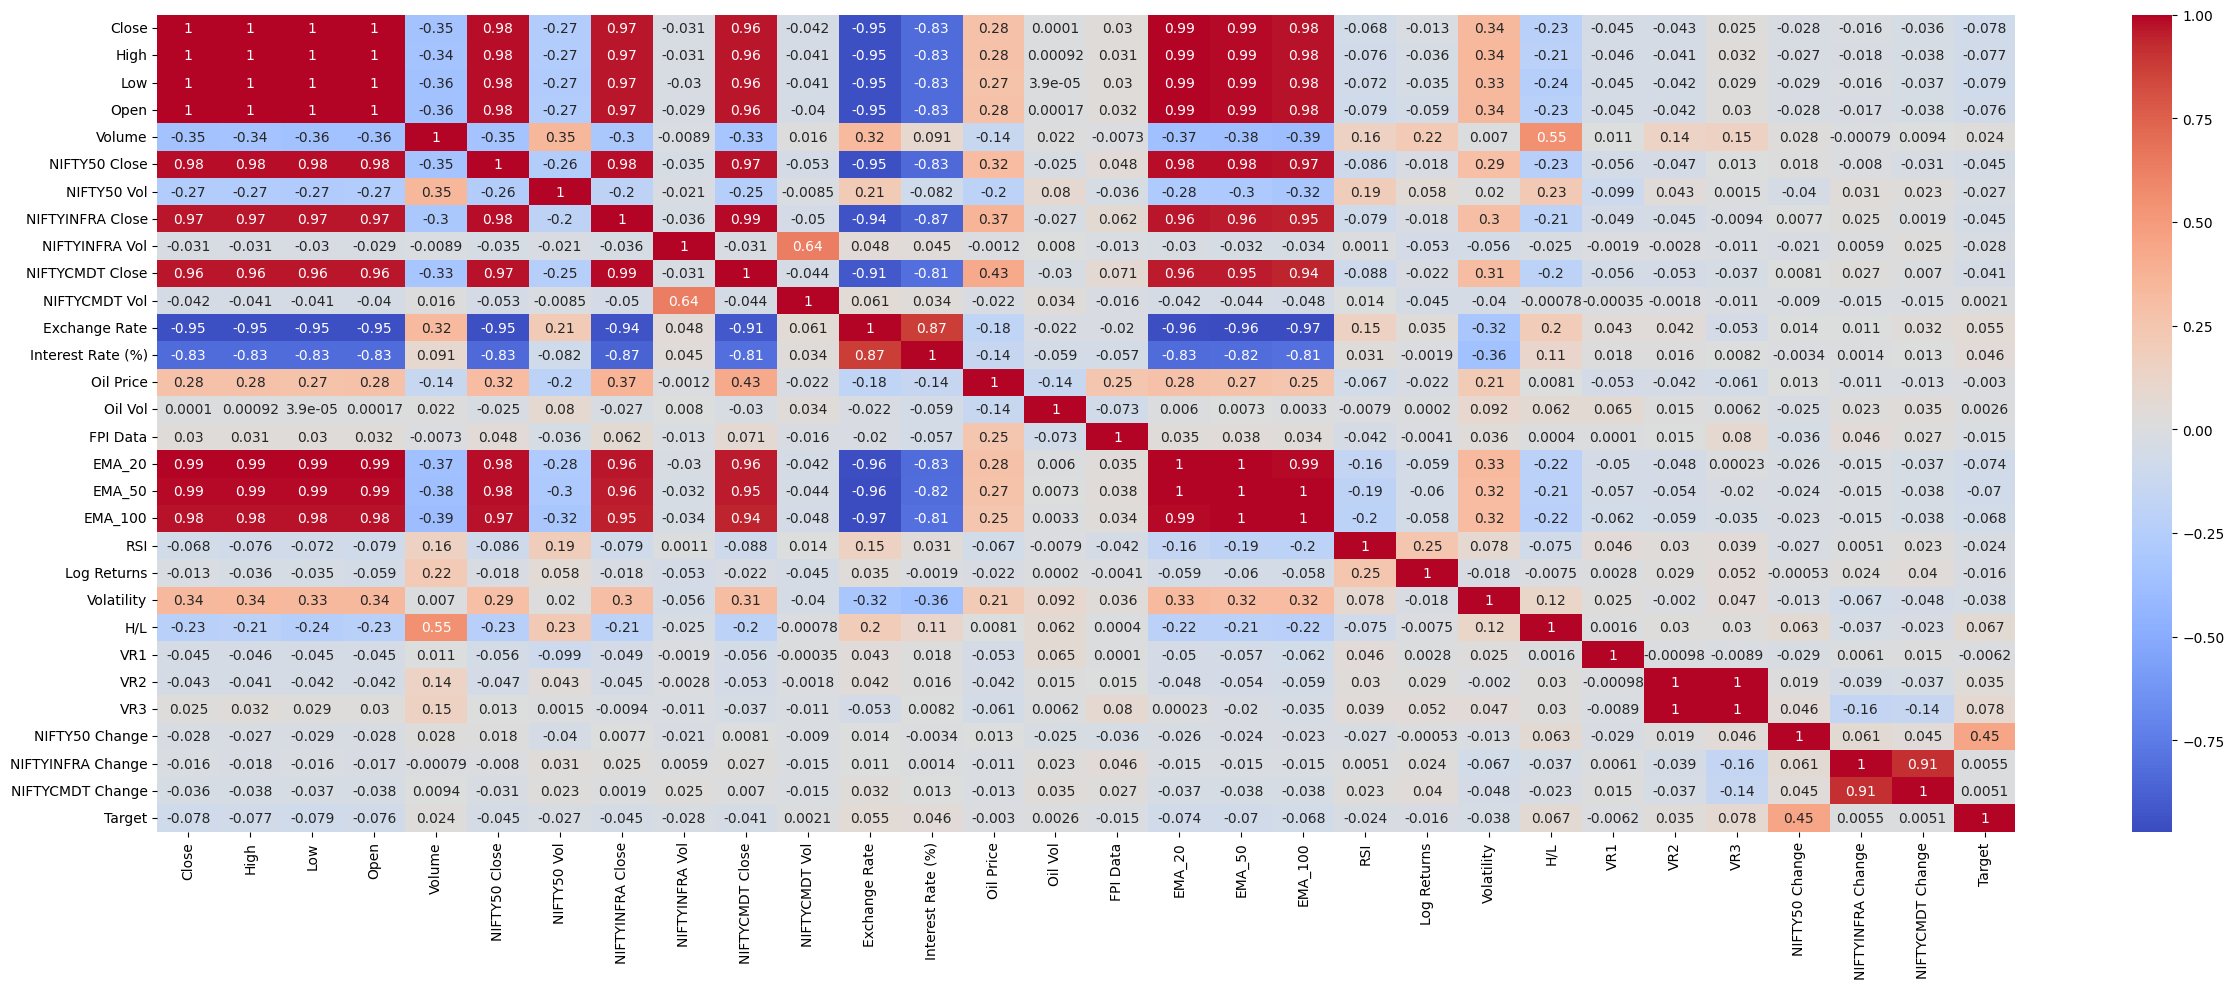

In [14]:
corr = final.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

**Variance Inflation Factor**

In [ ]:
final.replace([np.inf, -np.inf], np.nan, inplace=True)
final.fillna(method='ffill',inplace=True)
final=final.iloc[101:,:] # Initial 100 NA values for EMA_100 

In [17]:
vif_data = pd.DataFrame()
vif_data["feature"] = final.columns
vif_data["VIF"] = [variance_inflation_factor(final.values, i) for i in range(final.shape[1])]
vif_data

,feature,VIF
0,Close,3546.622482
1,High,3465.038368
2,Low,2998.041006
3,Open,2431.436193
4,Volume,7.500502
5,NIFTY50 Close,89.311771
6,NIFTY50 Vol,2.036493
7,NIFTYINFRA Close,165.302821
8,NIFTYINFRA Vol,1.717470
9,NIFTYCMDT Close,103.464376


## Importing Model's Libraries

In [18]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,roc_curve, roc_auc_score,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## Data Preprocessing

In [19]:
tscv = TimeSeriesSplit(n_splits=5)

In [20]:
X=final.drop('Target',axis=1)
y=final['Target']
split_index=int(0.8*len(X))
X_train=X[:split_index]
y_train=y[:split_index]
X_test=X[split_index:]
y_test=y[split_index:]

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression

**Train & Test**

In [102]:
regression=LogisticRegression()
regression.fit(X_train,y_train)
y_lr=regression.predict(X_test)
y_lr_proba = regression.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_lr))
print(f'ROC AUC Score: {roc_auc_score(y_test,y_lr_proba)}')

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       118
           1       0.67      0.77      0.72       106

    accuracy                           0.71       224
   macro avg       0.72      0.72      0.71       224
weighted avg       0.72      0.71      0.71       224

ROC AUC Score: 0.7854972817396866


**Plot Result**

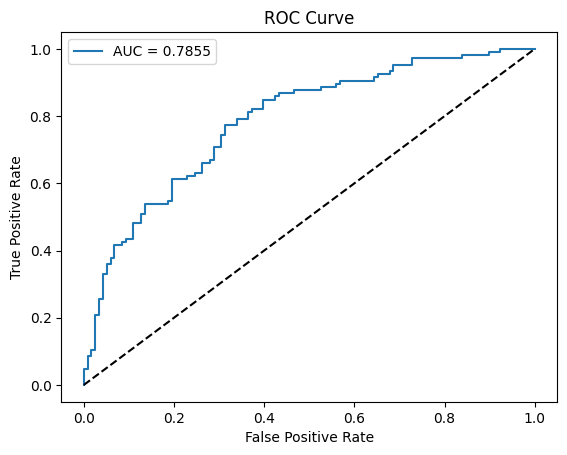

In [103]:
fpr, tpr, _ = roc_curve(y_test, y_lr_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Support Vector Classification

**Train & Test**

In [109]:
svr_param={'kernel':['linear','poly','rbf','sigmoid'],'degree':[1,2,3],'gamma':['scale','auto'],'C':[0.1,1,10]}
grid=GridSearchCV(estimator=SVC(probability=True),param_grid=svr_param,cv=tscv,refit=True,scoring='accuracy',verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_svc=grid.predict(X_test)
y_svc_proba = grid.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_svc))
print(f'ROC AUC Score: {roc_auc_score(y_test,y_svc_proba)}')

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       118
           1       0.69      0.65      0.67       106

    accuracy                           0.70       224
   macro avg       0.70      0.69      0.69       224
weighted avg       0.70      0.70      0.70       224

ROC AUC Score: 0.778541733290694


**Plot Result**

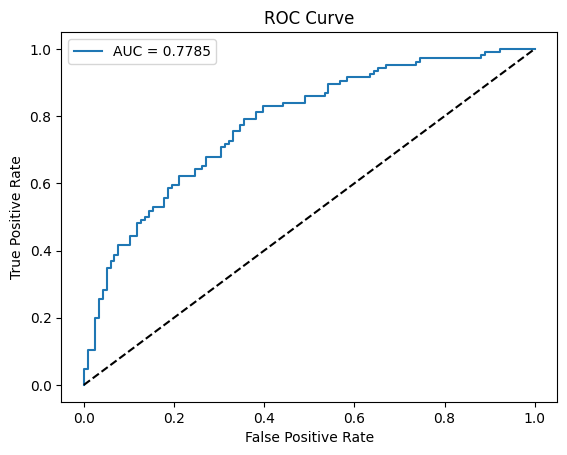

In [110]:
fpr, tpr, _ = roc_curve(y_test, y_svc_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Random Forest Classification

**Train & Test**

In [111]:
rf_param={'n_estimators':[100,200,300,500],'criterion':['entropy', 'gini', 'log_loss'],'max_depth': [5, 8, 15, 10, None],'max_features': [5, 7, 10],'min_samples_split': [2, 8, 15, 20]}
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=rf_param,refit=True,scoring='accuracy',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_rf=grid.predict(X_test)
y_rf_proba = grid.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_rf))
print(f'ROC AUC Score: {roc_auc_score(y_test,y_rf_proba)}')

              precision    recall  f1-score   support

           0       0.64      0.81      0.71       118
           1       0.69      0.49      0.57       106

    accuracy                           0.66       224
   macro avg       0.67      0.65      0.64       224
weighted avg       0.66      0.66      0.65       224

ROC AUC Score: 0.715542053086025


**Plot Result**

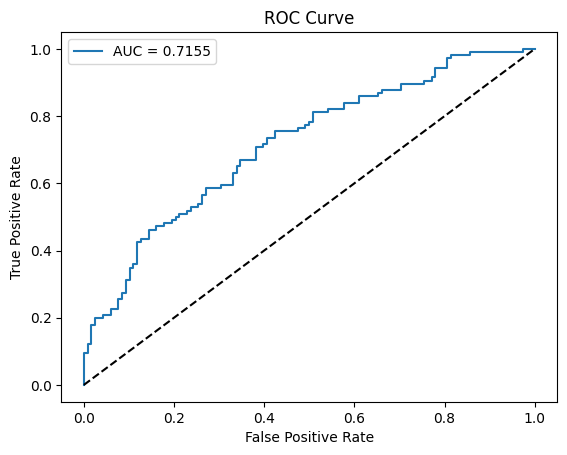

In [112]:
fpr, tpr, _ = roc_curve(y_test, y_rf_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Adaboost Classification

**Train & Test**

In [113]:
adb_param={'n_estimators':[100,300,500],'learning_rate':[0.01,0.05,0.1],'algorithm':['SAMME'],'random_state':[42]}
grid=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=adb_param,refit=True,scoring='accuracy',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_adb=grid.predict(X_test)
y_adb_proba = grid.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_adb))
print(f'ROC AUC Score: {roc_auc_score(y_test,y_adb_proba)}')

              precision    recall  f1-score   support

           0       0.76      0.57      0.65       118
           1       0.62      0.80      0.70       106

    accuracy                           0.68       224
   macro avg       0.69      0.68      0.68       224
weighted avg       0.70      0.68      0.68       224

ROC AUC Score: 0.7564358810361369


**Plot Result**

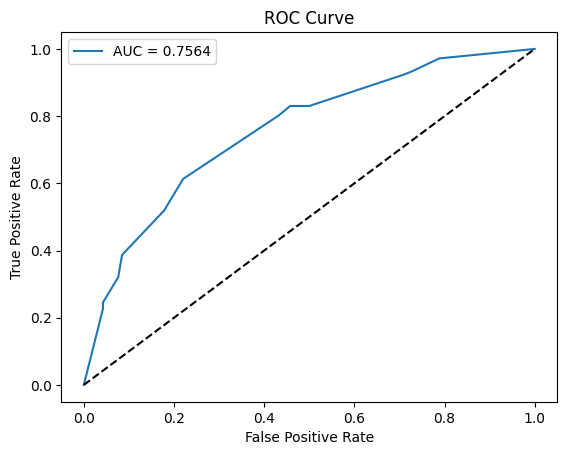

In [114]:
fpr, tpr, _ = roc_curve(y_test, y_adb_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Gradient Boost Classification

**Train & Test**

In [115]:
gb_param={'loss':['log_loss', 'exponential'],'learning_rate':[0.01,0.05,0.1],'n_estimators':[100,300,500],'criterion':['squared_error'],'min_samples_split': [2, 8, 15, 20]}
grid=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=gb_param,refit=True,scoring='accuracy',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_gb=grid.predict(X_test)
y_gb_proba = grid.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_gb))
print(f'ROC AUC Score: {roc_auc_score(y_test,y_gb_proba)}')

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       118
           1       0.60      0.68      0.64       106

    accuracy                           0.63       224
   macro avg       0.64      0.64      0.63       224
weighted avg       0.64      0.63      0.63       224

ROC AUC Score: 0.7106651742884553


**Plot Result**

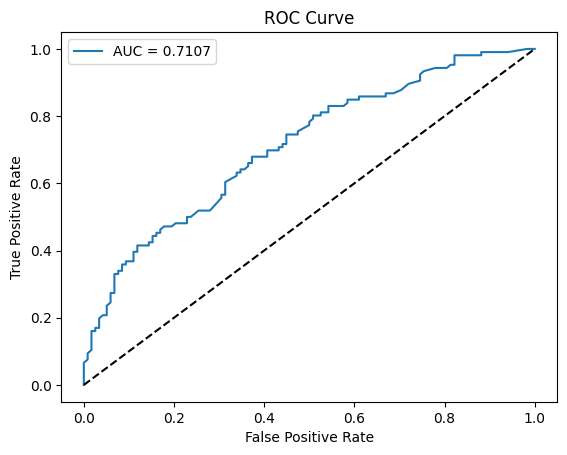

In [116]:
fpr, tpr, _ = roc_curve(y_test, y_gb_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## XGBoost Classfication

**Train & Test** 

In [117]:
xgb_param={'eta':[0.01,0.05,0.1],'gamma':[1,5,10,50,100],'max_depth':[3,5,10,15,None],'subsample':[0.05,0.1,0.5,1]}
grid=GridSearchCV(estimator=XGBClassifier(),param_grid=xgb_param,refit=True,scoring='accuracy',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_xgb=grid.predict(X_test)
y_xgb_proba = grid.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_xgb))
print(f'ROC AUC Score: {roc_auc_score(y_test,y_xgb_proba)}')

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       118
           1       0.69      0.73      0.71       106

    accuracy                           0.72       224
   macro avg       0.72      0.72      0.72       224
weighted avg       0.72      0.72      0.72       224

ROC AUC Score: 0.7649504317236969


**Plot Result**

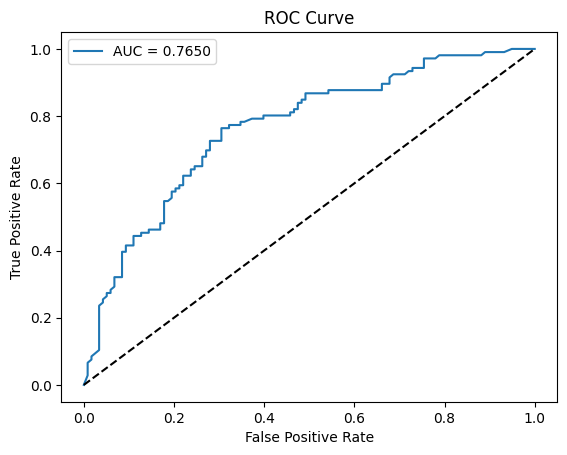

In [118]:
fpr, tpr, _ = roc_curve(y_test, y_xgb_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## LightGBM Classification

**Train & Test** 

In [22]:
lgb_param={'n_estimators':[100,300,500],'learning_rate':[0.01,0.05,0.1],'subsample':[0.8,0.9,1],'num_leaves':[31,62,200],'min_data_in_leaf': [10, 20, 50],'min_gain_to_split': [0.0, 0.01, 0.1] }
grid=GridSearchCV(estimator=LGBMClassifier(),param_grid=lgb_param,refit=True,scoring='accuracy',cv=tscv,verbose=0,n_jobs=-1)
grid.fit(X_train,y_train)
y_lgb=grid.predict(X_test)
y_lgb_proba = grid.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_lgb))
print(f'ROC AUC Score: {roc_auc_score(y_test,y_lgb_proba)}')

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Info] Number of positive: 483, number of negative: 411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6704
[LightGBM] [Info] Number of data points in the train set: 894, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540268 -> initscore=0.161423
[LightGBM] [Info] Start training from score 0.161423
[LightGBM] [Warnin

**Plot Result**

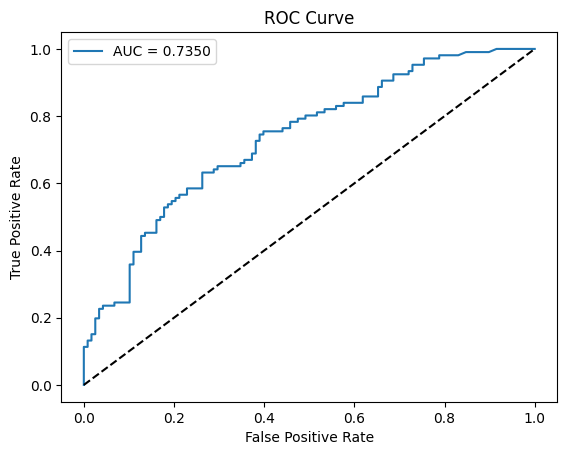

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_lgb_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()